# Power of Posters 
#### IMDB Rating Prediction

---
Problem Statement:  
You have to predict “imdb_score” from this movie data.  

https://github.com/sundeepblue/movie_rating_prediction  

We need to follow steps 1-5 out of which there is slight change in step 3

Changes in step 3:

* Download 4907 posters for movies.  
* Map all posters to given IMDB Rating.  
* Split data into test and train.   
* Predict movie rating based given the poster (classification problem).  
If needed you can use csv or json data that is available. We want to see the approach that you will follow to get acceptable accuracy with the given data set.  

Note: Code might not be up-to date, you need to scrap all images in order to run the experiment.  

In [20]:
%matplotlib inline
%reload_ext autoreload

In [21]:
import json,os
import pandas as pd

In [22]:
PATH = 'data/'
if not os.path.exists(PATH):
    os.mkdir(PATH)

#### Read movie meta data to get the target variable IMDB Score

In [23]:
movie_metadata = pd.read_csv('movie_metadata.csv')

In [24]:
movie_metadata.shape

(5043, 28)

In [25]:
movie_metadata.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


#### Reading budget data to get movie links

In [26]:
budget_data = pd.read_json('movie_budget.json')

In [27]:
budget_data.shape

(5164, 6)

In [28]:
budget_data.head(2)

,domestic_gross,movie_link,movie_name,production_budget,release_date,worldwide_gross
0,"$760,507,625",http://www.the-numbers.com/movie/Avatar#tab=su...,Avatar,"$425,000,000",12/18/2009,"$2,783,918,982"
1,"$936,662,225",http://www.the-numbers.com/movie/Star-Wars-Ep-...,Star Wars Ep. VII: The Force Awakens,"$306,000,000",12/18/2015,"$2,058,662,225"


#### Read url data to get IMDB Movie links

In [29]:
url_data = pd.read_json('fetch_imdb_url.json')

In [30]:
url_data.shape

(5153, 2)

In [31]:
url_data.head(2)

,movie_imdb_link,movie_name
0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar
1,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force Awakens


#### Read output data

In [32]:
output_data = pd.read_json('imdb_output.json')

In [33]:
len(output_data)

5043

In [34]:
output_data.head(2)

,aspect_ratio,budget,cast_info,color,content_rating,country,director_info,duration,genres,gross,...,language,movie_imdb_link,movie_title,num_critic_for_reviews,num_facebook_like,num_user_for_reviews,num_voted_users,plot_keywords,storyline,title_year
0,1.78 : 1,"[ $237,000,000 \n\n , (esti...","[{'actor_name': 'Sam Worthington', 'actor_link...",[Color],"[PG-13\n, |, , \n ...","[USA, UK]","{'director_facebook_likes': '6.9K', 'director_...",[\n 2h 42min\n ...,"[ Action, Adventure, Fantasy, Sci-Fi]","[ $760,505,847 \n\n , (USA)...",...,"[English, Spanish]",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,723.0,33K,3054.0,886204,"[paraplegic, native, marine, avatar, future]","\nWhen his brother is killed in a robbery, par...",2009.0
1,2.35 : 1,"[ $300,000,000 \n\n , (esti...","[{'actor_name': 'Johnny Depp', 'actor_link': '...",[Color],"[PG-13\n, |, , \n ...",[USA],"{'director_facebook_likes': '563', 'director_l...",[\n 2h 49min\n ...,"[ Action, Adventure, Fantasy]","[ $309,404,152 \n\n , (USA)...",...,[English],http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,302.0,5.1K,1238.0,471220,"[pirate, goddess, singapore, marriage ceremony...","\nAfter Elizabeth, Will, and Captain Barbossa ...",2007.0


In [39]:
budget_url_data = pd.merge(budget_data,url_data,on='movie_name',how='inner')

In [40]:
len(budget_url_data)

4618

In [41]:
budget_url_data.head(2)

,domestic_gross,movie_link,movie_name,production_budget,release_date,worldwide_gross,movie_imdb_link
0,"$760,507,625",http://www.the-numbers.com/movie/Avatar#tab=su...,Avatar,"$425,000,000",12/18/2009,"$2,783,918,982",http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,"$309,420,425",http://www.the-numbers.com/movie/Pirates-of-th...,Pirates of the Caribbean: At World's End,"$300,000,000",5/24/2007,"$963,420,425",http://www.imdb.com/title/tt0449088/?ref_=fn_t...


In [43]:
data = pd.merge(budget_url_data,output_data,on='movie_imdb_link',how='inner')

In [44]:
len(data)

4928

In [45]:
data.head(2)

,domestic_gross,movie_link,movie_name_x,production_budget,release_date,worldwide_gross,movie_imdb_link,aspect_ratio,budget,cast_info,...,imdb_score,language,movie_name_y,num_critic_for_reviews,num_facebook_like,num_user_for_reviews,num_voted_users,plot_keywords,storyline,title_year
0,"$760,507,625",http://www.the-numbers.com/movie/Avatar#tab=su...,Avatar,"$425,000,000",12/18/2009,"$2,783,918,982",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1.78 : 1,"[ $237,000,000 \n\n , (esti...","[{'actor_name': 'Sam Worthington', 'actor_link...",...,[7.9],"[English, Spanish]",Avatar,723.0,33K,3054.0,886204,"[paraplegic, native, marine, avatar, future]","\nWhen his brother is killed in a robbery, par...",2009.0
1,"$309,420,425",http://www.the-numbers.com/movie/Pirates-of-th...,Pirates of the Caribbean: At World's End,"$300,000,000",5/24/2007,"$963,420,425",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.35 : 1,"[ $300,000,000 \n\n , (esti...","[{'actor_name': 'Johnny Depp', 'actor_link': '...",...,[7.1],[English],Pirates of the Caribbean: At World's End,302.0,5.1K,1238.0,471220,"[pirate, goddess, singapore, marriage ceremony...","\nAfter Elizabeth, Will, and Captain Barbossa ...",2007.0


#### Drop duplicate poster urls

In [34]:
data = data.drop_duplicates(subset=['movie_imdb_link']).reset_index()

In [35]:
len(data)

4295

In [36]:
data['imdb_score'].isnull().any()

False

#### Standardise target variable

In [37]:
data['imdb_score'] = data['imdb_score'].apply(lambda x: float(x[0]))

In [39]:
data['rating_cls'] = 0
data['rating_cls'] = data['imdb_score'].apply(lambda x: int(x))

In [43]:
data['imdb_score'].head(5)

0    7.9
1    7.1
2    6.8
3    8.5
4    6.5
Name: imdb_score, dtype: float64

In [42]:
data['rating_cls'].head(5)

0    7
1    7
2    6
3    8
4    6
Name: rating_cls, dtype: int64

In [44]:
data['rating_cls'].min(),data['rating_cls'].max()

(1, 9)

#### Now, we have 9 categories as Ratings raning from 1 to 9.

In [49]:
data['image_id'] = data['movie_imdb_link'].apply(lambda x: x.split('/title/')[-1].split('/?ref')[0])

In [50]:
data['image_id'].head(5)

0    tt0499549
1    tt0449088
2    tt2379713
3    tt1345836
4    tt1210819
Name: image_id, dtype: object

#### Store dataset for future use

In [51]:
data[['image_id','imdb_score','rating_cls']].to_csv('data.csv',index=None)

#### Scrape posters

In [3]:
import requests
from bs4 import BeautifulSoup

BASE_PATH = PATH+'all/'
if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)
    
def scrape_imdb_movie_poster(imdb_movie_url):
    try:
        image_id = imdb_movie_url.split('/title/')[-1].split('/?ref')[0]
        r = requests.get(imdb_movie_url, allow_redirects=True)
        soup = BeautifulSoup(r.content,'html.parser')
        target_div = soup.find('div',{'class':'poster'})
        poster_img = target_div.find('img')
        imdb_poster_link = poster_img['src']
        r = requests.get(imdb_poster_link, allow_redirects=True)
        open(BASE_PATH+image_id, 'wb').write(r.content)
    except Exception as e:
        print(e)

In [53]:
scrape_imdb_movie_poster('http://www.imdb.com/title/tt2107644/?ref_=fn_t...')

In [54]:
data['movie_imdb_link'].apply(scrape_imdb_movie_poster)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
4265    None
4266    None
4267    None
4268    None
4269    None
4270    None
4271    None
4272    None
4273    None
4274    None
4275    None
4276    None
4277    None
4278    None
4279    None
4280    None
4281    None
4282    None
4283    None
4284    None
4285    None
4286    None
4287    None
4288    None
4289    None
4290    None
4291    None
4292    None
4293    None
4294    None
Name: movie_imdb_link, Length: 4295, dtype: object

#### Dataset preparation

In [4]:
from shutil import move,copyfile
CLASS_WISE_DATA_PATH = PATH + 'posters/'
if not os.path.exists(CLASS_WISE_DATA_PATH):
    os.mkdir(CLASS_WISE_DATA_PATH)
for row_data in data.iterrows():
    row = dict(row_data[1])
    cls = str(row['rating_cls'])
    imdb_movie_url = row['movie_imdb_link']
    image_id = imdb_movie_url.split('/title/')[-1].split('/?ref')[0]
    if not os.path.exists(CLASS_WISE_DATA_PATH + cls):
        os.mkdir(CLASS_WISE_DATA_PATH + cls)
    copyfile(BASE_PATH+image_id,CLASS_WISE_DATA_PATH+cls+'/'+image_id+'.jpeg')


### Generate Image Features and Measuring Image Quality

<br>

### 1. Dullness : Is the Image Very Dull ?   
    
   1.1 Image Dullness Score

### 2. Whiteness : Is the Image Very White ?  
   2.1 Image Whiteness Score  
    
### 3. Uniformity : Is the Image too Uniform ?
   3.1 Average Pixel Width

### 4. Colors : What are the top colors used in the Image ? 
   4.1 Dominant Color of the Image over different channels   
   4.2 Mean of Colors of the Image over different channels  
   4.3 Std Deviation of Colors of the Image over different channels  
       
<br>

In [4]:
from collections import defaultdict
from scipy.stats import itemfreq
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import feature, io
from PIL import Image as IMG
import numpy as np
import pandas as pd 
import operator
import cv2
import os 
import dlib

from IPython.core.display import HTML 
from IPython.display import Image

images_path = 'data/all/'
imgs = os.listdir(images_path)

features = pd.DataFrame()
features['image'] = imgs

## 1. Is the image Very Dull 

### Feature 1 : Dullness

Dull Images may not be good for the advirtisment purposes. The analysis of prominent colors present in the images can indicate a lot about if the image is dull or not.


In [36]:
def color_analysis(img):
    # obtain the color palatte of the image 
    palatte = defaultdict(int)
    for pixel in img.getdata():
        palatte[pixel] += 1
    
    # sort the colors present in the image 
    sorted_x = sorted(palatte.items(), key=operator.itemgetter(1), reverse = True)
    light_shade, dark_shade, shade_count, pixel_limit = 0, 0, 0, 25
    for i, x in enumerate(sorted_x[:pixel_limit]):
        if all(xx <= 20 for xx in x[0][:3]): ## dull : too much darkness 
            dark_shade += x[1]
        if all(xx >= 240 for xx in x[0][:3]): ## bright : too much whiteness 
            light_shade += x[1]
        shade_count += x[1]
        
    light_percent = round((float(light_shade)/shade_count)*100, 2)
    dark_percent = round((float(dark_shade)/shade_count)*100, 2)
    return light_percent, dark_percent

Lets compute the dull score for the sample images from Avito's dataset 

In [37]:
def perform_color_analysis(img, flag):
    path = images_path + img 
    im = IMG.open(path) #.convert("RGB")
    
    # cut the images into two halves as complete average may give bias results
    size = im.size
    halves = (size[0]/2, size[1]/2)
    im1 = im.crop((0, 0, size[0], halves[1]))
    im2 = im.crop((0, halves[1], size[0], size[1]))

    try:
        light_percent1, dark_percent1 = color_analysis(im1)
        light_percent2, dark_percent2 = color_analysis(im2)
    except Exception as e:
        return None

    light_percent = (light_percent1 + light_percent2)/2 
    dark_percent = (dark_percent1 + dark_percent2)/2 
    
    if flag == 'black':
        return dark_percent
    elif flag == 'white':
        return light_percent
    else:
        return None

In [39]:
features['dullness'] = features['image'].apply(lambda x : perform_color_analysis(x, 'black'))
topdull = features.sort_values('dullness', ascending = False)
topdull.head(5)

,image,dullness
3080,tt4178092,100.0
3405,tt0195714,100.0
441,tt0310357,100.0
3643,tt0320661,100.0
3627,tt0120347,100.0


In [40]:
len(features)

4295

Lets plot some of the images with very high dullness

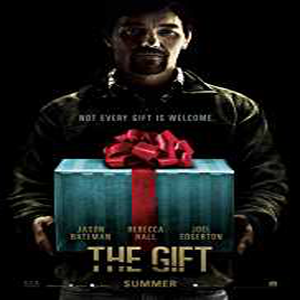

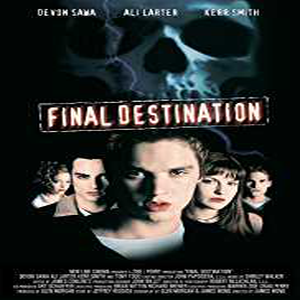

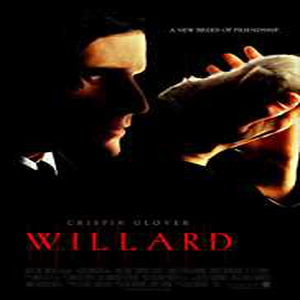

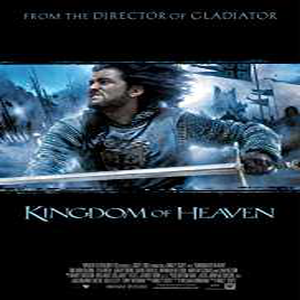

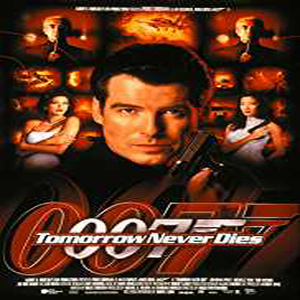

In [42]:
for j,x in topdull.head(5).iterrows():
    path = images_path + x['image']
    html = "<h4>Image : "+x['image']+" &nbsp;&nbsp;&nbsp; (Dullness : " + str(x['dullness']) +")</h4>"
    display(HTML(html))
    display(IMG.open(path).resize((300,300), IMG.ANTIALIAS))

## 2. Is the Image too bright or white 

### Feature 2 : Image Whiteness

Some images can be too white or too bright which might not be good for the advertisement purposes. Using the samy type of color analysis, we can check if the images are too white. 

In [43]:
features['whiteness'] = features['image'].apply(lambda x : perform_color_analysis(x, 'white'))
topdull = features.sort_values('whiteness', ascending = False)
topdull.head(5)

,image,dullness,whiteness
955,tt0109830,0.0,100.0
4251,tt1225822,0.0,100.0
2231,tt0308506,0.0,100.0
4021,tt1449283,0.0,100.0
2573,tt0400717,0.0,100.0


Lets plot some of the images having high whiteness score

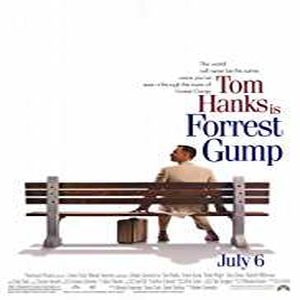

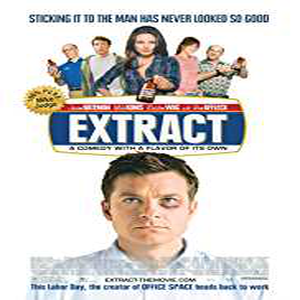

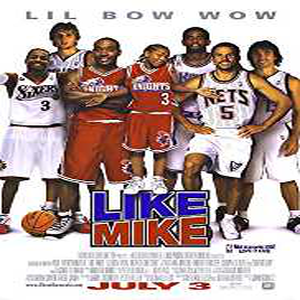

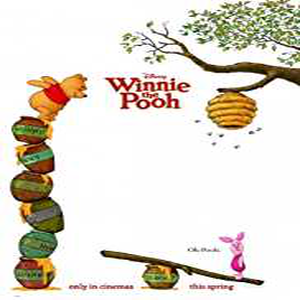

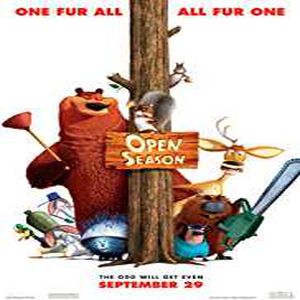

In [45]:
for j,x in topdull.head(5).iterrows():
    path = images_path + x['image']
    html = "<h4>Image : "+x['image']+" &nbsp;&nbsp;&nbsp; (Whiteness : " + str(x['whiteness']) +")</h4>"
    display(HTML(html))
    display(IMG.open(path).resize((300,300), IMG.ANTIALIAS))

## 3. Uniform Images (with no pixel variations)

### Feature 3 - Average Pixel Width (using edge detection)

Some images may contain no pixel variation and are entirely uniform. Average Pixel Width is a measure which indicates the amount of edges present in the image. If this number comes out to be very low, then the image is most likely a uniform image and may not represent right content. 

To compute this measure, We can use skimage's Canny Detection

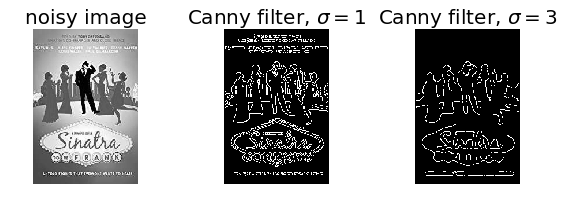

In [46]:
im1 = IMG.open(images_path+'tt4704314')
im2 = im1.convert(mode='L')
im = np.asarray(im2)

edges1 = feature.canny(im, sigma=1)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [47]:
def average_pixel_width(img):
    path = images_path + img 
    im = IMG.open(path)    
    im_array = np.asarray(im.convert(mode='L'))
    edges_sigma1 = feature.canny(im_array, sigma=1)
    apw = (float(np.sum(edges_sigma1)) / (im.size[0]*im.size[1]))
    return apw*100

In [48]:
features['average_pixel_width'] = features['image'].apply(average_pixel_width)
tempdf = features.sort_values('average_pixel_width').head()
tempdf 

,image,dullness,whiteness,average_pixel_width
3212,tt0063522,46.030,0.305,3.046580
3812,tt0167404,100.000,0.000,3.696490
3219,tt0120710,99.125,0.000,3.790799
4263,tt1637688,76.310,0.000,3.801050
3510,tt1379182,0.000,0.000,4.399705


Lets plot some images having very low average pixel width

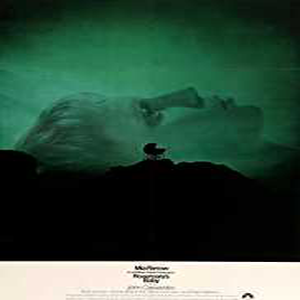

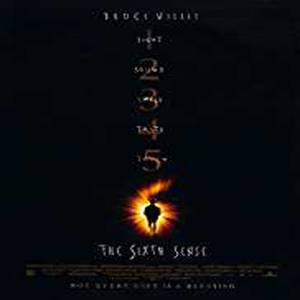

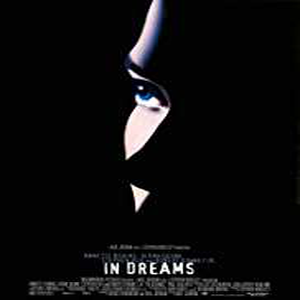

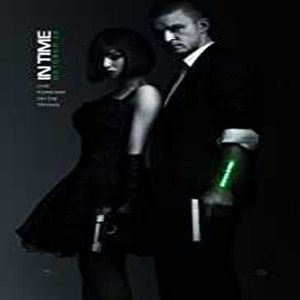

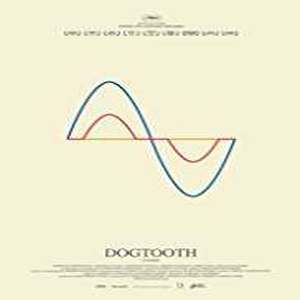

In [49]:
for j,x in tempdf.head(5).iterrows():
    path = images_path + x['image']
    html = "<h4>Image : "+x['image']+" &nbsp;&nbsp;&nbsp; (Average Pixel Width : " + str(x['average_pixel_width']) +")</h4>"
    display(HTML(html))
    display(IMG.open(path).resize((300,300), IMG.ANTIALIAS))

Above images are most likely nosie and have low average pixel width values.

## 4. What are the key colors used in the image ?

Colors used in the images play a significant role in garnering the attraction from users. Additional features related to colors such as Dominant and Average colors can be created. 

### Feature 4.1 - Dominant Color

In [50]:
def get_dominant_color(img):
    path = images_path + img 
    img = cv2.imread(path)
    arr = np.float32(img)
    pixels = arr.reshape((-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centroids = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)

    palette = np.uint8(centroids)
    quantized = palette[labels.flatten()]
    quantized = quantized.reshape(img.shape)

    dominant_color = palette[np.argmax(itemfreq(labels)[:, -1])]
    return dominant_color

features['dominant_color'] = features['image'].apply(get_dominant_color)
features.head(10)

/home/lazylearner/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


,image,dullness,whiteness,average_pixel_width,dominant_color
0,tt0102984,46.850,3.150,15.478924,"[18, 11, 14]"
1,tt0116277,93.650,0.965,16.702887,"[5, 5, 7]"
2,tt1540128,10.885,78.235,17.182631,"[19, 20, 46]"
3,tt0166924,98.840,0.885,12.653764,"[6, 3, 4]"
4,tt1197624,80.845,9.660,10.597425,"[8, 7, 8]"
5,tt2095649,54.910,16.585,15.271855,"[6, 14, 26]"
6,tt0245803,55.455,5.505,16.073479,"[14, 9, 8]"
7,tt0095742,15.475,0.000,18.500902,"[26, 20, 23]"
8,tt0358082,0.000,46.690,18.359439,"[196, 130, 76]"
9,tt0110490,64.095,0.000,20.948827,"[17, 20, 26]"


Lets split the dominant color's RGB values to separate features 

- Feature 4.1.1 dominant_red value
- Feature 4.1.2 dominant_green value
- Feature 4.1.3 dominant_blue value

In [51]:
features['dominant_red'] = features['dominant_color'].apply(lambda x: x[0]) / 255
features['dominant_green'] = features['dominant_color'].apply(lambda x: x[1]) / 255
features['dominant_blue'] = features['dominant_color'].apply(lambda x: x[2]) / 255
features[['dominant_red', 'dominant_green', 'dominant_blue']].head(5)

,dominant_red,dominant_green,dominant_blue
0,0.070588,0.043137,0.054902
1,0.019608,0.019608,0.027451
2,0.074510,0.078431,0.180392
3,0.023529,0.011765,0.015686
4,0.031373,0.027451,0.031373


### Feature 4.2 Average Color

In [52]:
def get_average_color(img):
    path = images_path + img 
    img = cv2.imread(path)
    average_color = [img[:, :, i].mean() for i in range(img.shape[-1])]
    return average_color

features['average_color'] = features['image'].apply(get_average_color)
features.head(10)

,image,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color
0,tt0102984,46.850,3.150,15.478924,"[18, 11, 14]",0.070588,0.043137,0.054902,"[97.15210349352141, 77.55750779071674, 82.8223..."
1,tt0116277,93.650,0.965,16.702887,"[5, 5, 7]",0.019608,0.019608,0.027451,"[44.26061997703789, 43.461907495489584, 51.405..."
2,tt1540128,10.885,78.235,17.182631,"[19, 20, 46]",0.074510,0.078431,0.180392,"[104.77622191241595, 130.24518205674923, 140.9..."
3,tt0166924,98.840,0.885,12.653764,"[6, 3, 4]",0.023529,0.011765,0.015686,"[59.87762424143021, 68.32216663933082, 82.2605..."
4,tt1197624,80.845,9.660,10.597425,"[8, 7, 8]",0.031373,0.027451,0.031373,"[81.2952271608988, 80.50957438084303, 97.76724..."
5,tt2095649,54.910,16.585,15.271855,"[6, 14, 26]",0.023529,0.054902,0.101961,"[67.14015089388224, 84.96348614072495, 112.019..."
6,tt0245803,55.455,5.505,16.073479,"[14, 9, 8]",0.054902,0.035294,0.031373,"[107.87067410201739, 93.41376906675414, 79.111..."
7,tt0095742,15.475,0.000,18.500902,"[26, 20, 23]",0.101961,0.078431,0.090196,"[61.52605789732655, 62.1591561423651, 74.55580..."
8,tt0358082,0.000,46.690,18.359439,"[196, 130, 76]",0.768627,0.509804,0.298039,"[176.40847958012137, 155.77296211251436, 147.0..."
9,tt0110490,64.095,0.000,20.948827,"[17, 20, 26]",0.066667,0.078431,0.101961,"[67.1921436772183, 74.25928735443661, 116.9241..."


In [53]:
features['average_red'] = features['average_color'].apply(lambda x: x[0]) / 255
features['average_green'] = features['average_color'].apply(lambda x: x[1]) / 255
features['average_blue'] = features['average_color'].apply(lambda x: x[2]) / 255
features[['average_red', 'average_green', 'average_blue']].head(5)

,average_red,average_green,average_blue
0,0.380989,0.304147,0.324794
1,0.173571,0.170439,0.201591
2,0.410887,0.510765,0.552910
3,0.234814,0.267930,0.322591
4,0.318805,0.315724,0.383401


In [54]:
features.head(5)

,image,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color,average_red,average_green,average_blue
0,tt0102984,46.850,3.150,15.478924,"[18, 11, 14]",0.070588,0.043137,0.054902,"[97.15210349352141, 77.55750779071674, 82.8223...",0.380989,0.304147,0.324794
1,tt0116277,93.650,0.965,16.702887,"[5, 5, 7]",0.019608,0.019608,0.027451,"[44.26061997703789, 43.461907495489584, 51.405...",0.173571,0.170439,0.201591
2,tt1540128,10.885,78.235,17.182631,"[19, 20, 46]",0.074510,0.078431,0.180392,"[104.77622191241595, 130.24518205674923, 140.9...",0.410887,0.510765,0.552910
3,tt0166924,98.840,0.885,12.653764,"[6, 3, 4]",0.023529,0.011765,0.015686,"[59.87762424143021, 68.32216663933082, 82.2605...",0.234814,0.267930,0.322591
4,tt1197624,80.845,9.660,10.597425,"[8, 7, 8]",0.031373,0.027451,0.031373,"[81.2952271608988, 80.50957438084303, 97.76724...",0.318805,0.315724,0.383401


### Feature 4.3 Std Dev in Color

In [28]:
def get_stddev_color(img):
    path = images_path + img 
    img = cv2.imread(path)
    average_color = [img[:, :, i].std() for i in range(img.shape[-1])]
    return average_color

features['stddev_color'] = features['image'].apply(get_stddev_color)
features.head(10)

,image,num_faces,stddev_color
0,tt0102984,1,"[75.15191608815414, 63.62527672502016, 65.7685..."
1,tt0116277,0,"[65.3338876313723, 64.61402815625239, 68.47951..."
2,tt1540128,5,"[96.21461884630372, 96.54765085742416, 97.4415..."
3,tt0166924,1,"[69.66159010436088, 84.36285403298209, 101.883..."
4,tt1197624,0,"[92.51650428907354, 91.3932283584573, 101.0370..."
5,tt2095649,1,"[78.0812841514023, 84.45019363624702, 92.67043..."
6,tt0245803,0,"[81.62242508414141, 76.48798619925395, 70.1728..."
7,tt0095742,0,"[47.82674812957105, 58.19783831968501, 66.2793..."
8,tt0358082,0,"[78.69603420654005, 70.80198169709816, 77.7131..."
9,tt0110490,1,"[53.22972848297606, 56.41266482376289, 78.5159..."


In [30]:
features['stddev_red'] = features['stddev_color'].apply(lambda x: x[0]) / 255
features['stddev_green'] = features['stddev_color'].apply(lambda x: x[1]) / 255
features['stddev_blue'] = features['stddev_color'].apply(lambda x: x[2]) / 255
features[['stddev_red', 'stddev_green', 'stddev_blue']].head(5)

,stddev_red,stddev_green,stddev_blue
0,0.294713,0.249511,0.257916
1,0.256211,0.253388,0.268547
2,0.377312,0.378618,0.382124
3,0.273183,0.330835,0.399544
4,0.362810,0.358405,0.396224


In [31]:
features.head()

,image,num_faces,stddev_color,stddev_red,stddev_green,stddev_blue
0,tt0102984,1,"[75.15191608815414, 63.62527672502016, 65.7685...",0.294713,0.249511,0.257916
1,tt0116277,0,"[65.3338876313723, 64.61402815625239, 68.47951...",0.256211,0.253388,0.268547
2,tt1540128,5,"[96.21461884630372, 96.54765085742416, 97.4415...",0.377312,0.378618,0.382124
3,tt0166924,1,"[69.66159010436088, 84.36285403298209, 101.883...",0.273183,0.330835,0.399544
4,tt1197624,0,"[92.51650428907354, 91.3932283584573, 101.0370...",0.362810,0.358405,0.396224


## Number of faces

In [16]:
def detect_faces(detector, image_id):
    path = images_path + image_id
    img = io.imread(path)
    dets = detector(img, 2) # Run the face detector, upsampling the image 2 times to find smaller faces.
    return len(dets)

In [17]:
detector = dlib.get_frontal_face_detector()
detect_faces(detector,'tt1540128')

5

In [18]:
detector = dlib.get_frontal_face_detector()
features['num_faces'] = features['image'].apply(lambda x : detect_faces(detector,x))
top_by_facecount = features.sort_values('num_faces', ascending = False)
top_by_facecount.head(5)

,image,num_faces
2237,tt1560747,17
71,tt0075784,12
540,tt1272886,11
434,tt1717210,10
1055,tt3760922,9


### Modelling

#### Classifier

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import gc

In [48]:
#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

In [49]:
data = pd.read_csv('data.csv')

In [50]:
data.head()

,image,imdb_score,rating_cls
0,tt0499549,7.9,7
1,tt0449088,7.1,7
2,tt2379713,6.8,6
3,tt1345836,8.5,8
4,tt1210819,6.5,6


In [51]:
data['rating_cls'].value_counts()

6    1571
7    1201
5     856
4     285
8     251
3      93
2      29
9       6
1       3
Name: rating_cls, dtype: int64

In [52]:
cols = list(data.columns); cols

['image', 'imdb_score', 'rating_cls']

In [53]:
features = pd.read_csv('image_features_v2.csv')

In [54]:
data_with_features = pd.merge(data,features,on='image',how='inner')

In [55]:
len(data_with_features)

4295

In [56]:
data_with_features.loc[data_with_features.rating_cls == 9]

,image,imdb_score,rating_cls,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color,average_red,average_green,average_blue,num_faces,stddev_color,stddev_red,stddev_green,stddev_blue
55,tt0468569,9.0,9,48.765,0.000,17.088322,[30 17 6],0.117647,0.066667,0.023529,"[81.21930867639823, 69.78101935378055, 46.2938...",0.318507,0.273651,0.181544,0,"[57.54262652838461, 58.14909639530162, 59.7829...",0.225657,0.228036,0.234443
1739,tt0111161,9.3,9,90.165,0.000,15.714696,[ 5 8 16],0.019608,0.031373,0.062745,"[51.00151713957684, 66.51767262588159, 85.8168...",0.200006,0.260854,0.336537,0,"[67.57773785618046, 82.37241275712583, 92.2663...",0.265011,0.323029,0.361829
2441,tt0691996,9.5,9,5.085,0.000,17.039118,[90 88 7],0.352941,0.345098,0.027451,"[101.31620059045432, 101.37735771690996, 70.61...",0.397318,0.397558,0.276938,2,"[57.47769572583405, 57.90114161341376, 80.9057...",0.225403,0.227063,0.317278
2501,tt0071562,9.0,9,100.000,0.000,6.796375,[0 0 1],0.000000,0.000000,0.003922,"[12.006909135640479, 16.893841233393474, 20.21...",0.047086,0.066250,0.079287,1,"[35.56557223610576, 49.39353794515464, 55.0187...",0.139473,0.193700,0.215760
3028,tt0068646,9.2,9,99.755,0.000,10.542070,[1 1 3],0.003922,0.003922,0.011765,"[34.07159258651796, 44.14964326718058, 54.5159...",0.133614,0.173136,0.213788,1,"[61.43373453988563, 74.57518812347475, 84.4045...",0.240917,0.292452,0.330998
3041,tt2802850,9.0,9,0.000,2.805,25.984091,[204 221 236],0.800000,0.866667,0.925490,"[144.92242086271938, 152.02759553878957, 170.3...",0.568323,0.596187,0.668170,1,"[55.37633493262673, 65.40422887831163, 72.7539...",0.217162,0.256487,0.285309


-----
Dropping classes 1 & 9 as they have only 3 and 6 images each

In [57]:
df = data_with_features[(data_with_features.rating_cls !=9)]
df = df[(df.rating_cls !=1)]

In [58]:
df.head()

,image,imdb_score,rating_cls,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color,average_red,average_green,average_blue,num_faces,stddev_color,stddev_red,stddev_green,stddev_blue
0,tt0499549,7.9,7,96.78,0.00,12.098163,[13 9 11],0.050980,0.035294,0.043137,"[54.525155814334916, 45.599680170575695, 47.15...",0.213824,0.178822,0.184932,0,"[60.334983697577485, 53.873449869569306, 59.07...",0.236608,0.211268,0.231683
1,tt0449088,7.1,7,0.00,42.11,11.936198,[249 245 242],0.976471,0.960784,0.949020,"[176.47369608003936, 169.01226012793177, 164.4...",0.692054,0.662793,0.645067,0,"[67.72089858542287, 69.95974537098138, 71.3304...",0.265572,0.274352,0.279727
2,tt2379713,6.8,6,0.00,0.00,9.531327,[66 52 37],0.258824,0.203922,0.145098,"[89.75110710185336, 79.39193455797934, 69.7191...",0.351965,0.311341,0.273408,1,"[67.42675310135841, 70.49950190230659, 75.2800...",0.264419,0.276469,0.295216
3,tt1345836,8.5,8,100.00,0.00,18.859685,[4 4 9],0.015686,0.015686,0.035294,"[36.41912005904543, 45.954075774971294, 64.438...",0.142820,0.180212,0.252699,0,"[55.74266157544301, 68.89627298505529, 80.8426...",0.218599,0.270181,0.317030
4,tt1210819,6.5,6,0.00,0.00,21.260456,[41 17 21],0.160784,0.066667,0.082353,"[83.71153846153847, 75.6333647695588, 93.33709...",0.328281,0.296601,0.366028,2,"[55.647565782712256, 67.02520132916412, 77.781...",0.218226,0.262844,0.305025


In [59]:
len(df)

4286

In [60]:
list(df.columns)

['image',
 'imdb_score',
 'rating_cls',
 'dullness',
 'whiteness',
 'average_pixel_width',
 'dominant_color',
 'dominant_red',
 'dominant_green',
 'dominant_blue',
 'average_color',
 'average_red',
 'average_green',
 'average_blue',
 'num_faces',
 'stddev_color',
 'stddev_red',
 'stddev_green',
 'stddev_blue']

In [61]:
df.isnull().sum()

image                  0
imdb_score             0
rating_cls             0
dullness               1
whiteness              1
average_pixel_width    0
dominant_color         0
dominant_red           0
dominant_green         0
dominant_blue          0
average_color          0
average_red            0
average_green          0
average_blue           0
num_faces              0
stddev_color           0
stddev_red             0
stddev_green           0
stddev_blue            0
dtype: int64

In [62]:
df.dropna(axis=0,inplace=True)

In [63]:
len(df)

4285

----
Defining the predictor variables and target variables

In [64]:
predictors = [
                'dullness',
                'whiteness',
                'average_pixel_width',
                'dominant_red',
                'dominant_green',
                'dominant_blue',
                'average_red',
                'average_green',
                'average_blue',
                'stddev_red',
                'stddev_green',
                'stddev_blue',
                'num_faces',
             ]

dep = 'rating_cls'

----
Exoeriment using different algorithms like   
* RandomForest classifier  
* Boosting Based classifiers as LightGBM  

In [65]:
X_train,X_test,y_train,y_test = train_test_split(df[predictors],
                                                 df[dep],
                                                 test_size=0.2,
                                                 random_state=0)

In [66]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3428, 13), (3428,), (857, 13), (857,))

In [76]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=6)

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
acc = rf.score(X_test,y_test)*100; acc

37.92298716452742

In [81]:
preds = rf.predict(X_test)

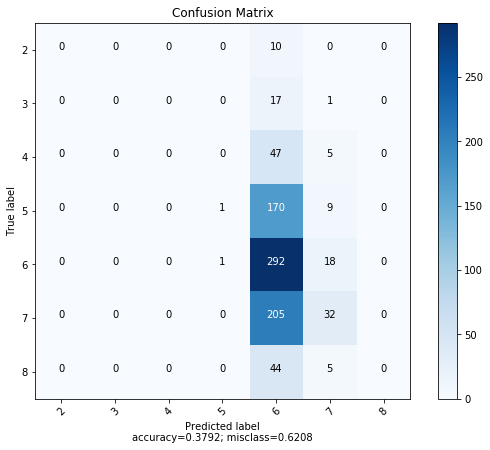

In [82]:
cm = confusion_matrix(y_test,preds)

plot_confusion_matrix(cm = cm , 
                      normalize    = False,
#                       target_names = ["1","2","3","4","5","6","7","8","9"],
                      target_names = ["2","3","4","5","6","7","8"],
                      title        = "Confusion Matrix")

In [83]:
print("Accuracy using Random Forest : {}".format(accuracy_score(y_test,preds)))
print("F1-Score using Random Forest : {}".format(f1_score(y_test,preds,average='weighted')))

Accuracy using Random Forest : 0.3792298716452742
F1-Score using Random Forest : 0.25332615702328326


/home/lazylearner/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----
Looks like imbalance is dominating as usual

-----
##### Try Oversampling using Synthetic Minority OMversampling Technique (SMOTE)

In [85]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [86]:
smote = SMOTE(random_state=0,sampling_strategy='all')
# smote = RandomOverSampler(random_state=0)
# smote = RandomUnderSampler(random_state=0)

In [87]:
X, y = df[predictors], df[dep]

In [88]:
X_smote, y_smote = smote.fit_resample(X,y)

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [90]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8792, 13), (8792,), (2198, 13), (2198,))

In [91]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
acc = rf.score(X_test,y_test)*100; acc

39.21747042766151

In [93]:
preds = rf.predict(X_test)

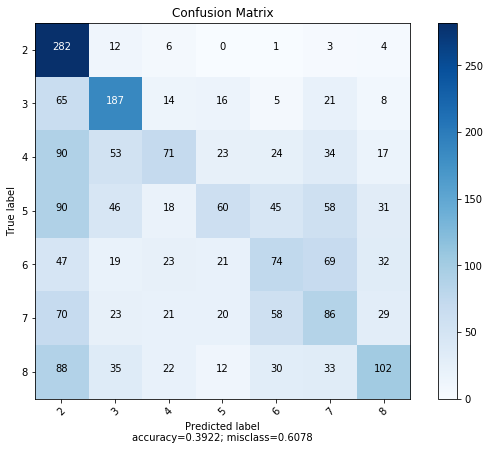

In [94]:
cm = confusion_matrix(y_test,preds)

plot_confusion_matrix(cm = cm , 
                      normalize    = False,
#                       target_names = ["1","2","3","4","5","6","7","8","9"],
                      target_names = ["2","3","4","5","6","7","8"],
                      title        = "Confusion Matrix")

In [95]:
print("Accuracy using Random Forest : {}".format(accuracy_score(y_test,preds)))
print("F1-Score using Random Forest : {}".format(f1_score(y_test,preds,average='weighted')))

Accuracy using Random Forest : 0.3921747042766151
F1-Score using Random Forest : 0.36410948905380097


----
F1-Score improved but, it can improve further

In [330]:
df[predictors].columns

Index(['dullness', 'whiteness', 'average_pixel_width', 'dominant_red',
       'dominant_green', 'dominant_blue', 'average_red', 'average_green',
       'average_blue', 'stddev_red', 'stddev_green', 'stddev_blue',
       'num_faces'],
      dtype='object')

In [331]:
rf.feature_importances_

array([0.09934364, 0.10988257, 0.06934349, 0.06468387, 0.09191425,
       0.0841708 , 0.04311127, 0.04366819, 0.04691425, 0.06656279,
       0.06021985, 0.07679502, 0.14339002])

----
##### Try Light GBM algorithm for boosting bases algorithm

In [ ]:
# lightgbm

In [96]:
import lightgbm as lgb

In [97]:
def run_lgb(train_X, train_y, val_X, val_y, test_X=None, is_unbalance=False):
    params = {
        # "objective" : "regression",
        "objective" : "multiclass",
        "num_class" : 7,
        "is_unbalance" : is_unbalance,
        # "metric" : "rmse",
        "metric" : "multi_logloss",
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=20, evals_result=evals_result)
    pred_test_y = None
#     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [98]:
# Splitting the data for model training

df['norm_rating_cls'] = 0
df.loc[df.rating_cls == 2,'norm_rating_cls'] = 0
df.loc[df.rating_cls == 3,'norm_rating_cls'] = 1
df.loc[df.rating_cls == 4,'norm_rating_cls'] = 2
df.loc[df.rating_cls == 5,'norm_rating_cls'] = 3
df.loc[df.rating_cls == 6,'norm_rating_cls'] = 4
df.loc[df.rating_cls == 7,'norm_rating_cls'] = 5
df.loc[df.rating_cls == 8,'norm_rating_cls'] = 6

dep = 'norm_rating_cls'

X_train,X_test,y_train,y_test = train_test_split(df[predictors],
                                                 df[dep],
                                                 test_size=0.2,
                                                 random_state=0)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Training the model #
pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test,is_unbalance=True)
# pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test, test_X)


(3428, 13) (3428,) (857, 13) (857,)
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's multi_logloss: 1.57935
[40]	valid_0's multi_logloss: 1.5414
[60]	valid_0's multi_logloss: 1.55343
[80]	valid_0's multi_logloss: 1.57721
[100]	valid_0's multi_logloss: 1.60425
[120]	valid_0's multi_logloss: 1.6344
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 1.54105


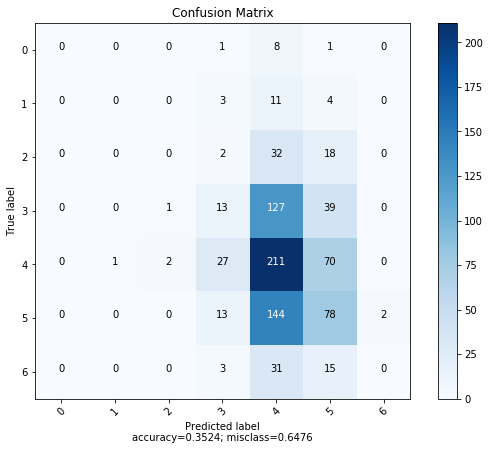

In [99]:
preds = model.predict(X_test, num_iteration=model.best_iteration)

preds = np.argmax(preds,axis=1)

cm = confusion_matrix(y_test,preds)

plot_confusion_matrix(cm = cm , 
                      normalize    = False,
#                       target_names = ["1","2","3","4","5","6","7","8","9"],
                      target_names = ["0","1","2","3","4","5","6"],
                      title        = "Confusion Matrix")

----
Imbalance is again dominating but,

Using oversampled data

In [100]:
df['norm_rating_cls'] = 0
df.loc[df.rating_cls == 2,'norm_rating_cls'] = 0
df.loc[df.rating_cls == 3,'norm_rating_cls'] = 1
df.loc[df.rating_cls == 4,'norm_rating_cls'] = 2
df.loc[df.rating_cls == 5,'norm_rating_cls'] = 3
df.loc[df.rating_cls == 6,'norm_rating_cls'] = 4
df.loc[df.rating_cls == 7,'norm_rating_cls'] = 5
df.loc[df.rating_cls == 8,'norm_rating_cls'] = 6

dep = 'norm_rating_cls'

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
# smote = RandomOverSampler(random_state=0)
# smote = RandomUnderSampler(random_state=0)

X, y = df[predictors], df[dep]

X_smote, y_smote = smote.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Training the model #
pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test)


(8792, 13) (8792,) (2198, 13) (2198,)
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's multi_logloss: 1.47272
[40]	valid_0's multi_logloss: 1.28868
[60]	valid_0's multi_logloss: 1.19253
[80]	valid_0's multi_logloss: 1.12783
[100]	valid_0's multi_logloss: 1.07867
[120]	valid_0's multi_logloss: 1.03885
[140]	valid_0's multi_logloss: 1.00658
[160]	valid_0's multi_logloss: 0.9754
[180]	valid_0's multi_logloss: 0.953066
[200]	valid_0's multi_logloss: 0.93346
[220]	valid_0's multi_logloss: 0.9183
[240]	valid_0's multi_logloss: 0.90191
[260]	valid_0's multi_logloss: 0.888878
[280]	valid_0's multi_logloss: 0.87544
[300]	valid_0's multi_logloss: 0.866561
[320]	valid_0's multi_logloss: 0.857418
[340]	valid_0's multi_logloss: 0.849033
[360]	valid_0's multi_logloss: 0.84379
[380]	valid_0's multi_logloss: 0.839583
[400]	valid_0's multi_logloss: 0.835746
[420]	valid_0's multi_logloss: 0.830197
[440]	valid_0's multi_logloss: 0.827038
[460]	valid_0's multi_logloss: 0.82483

#### Have a look at feature importances

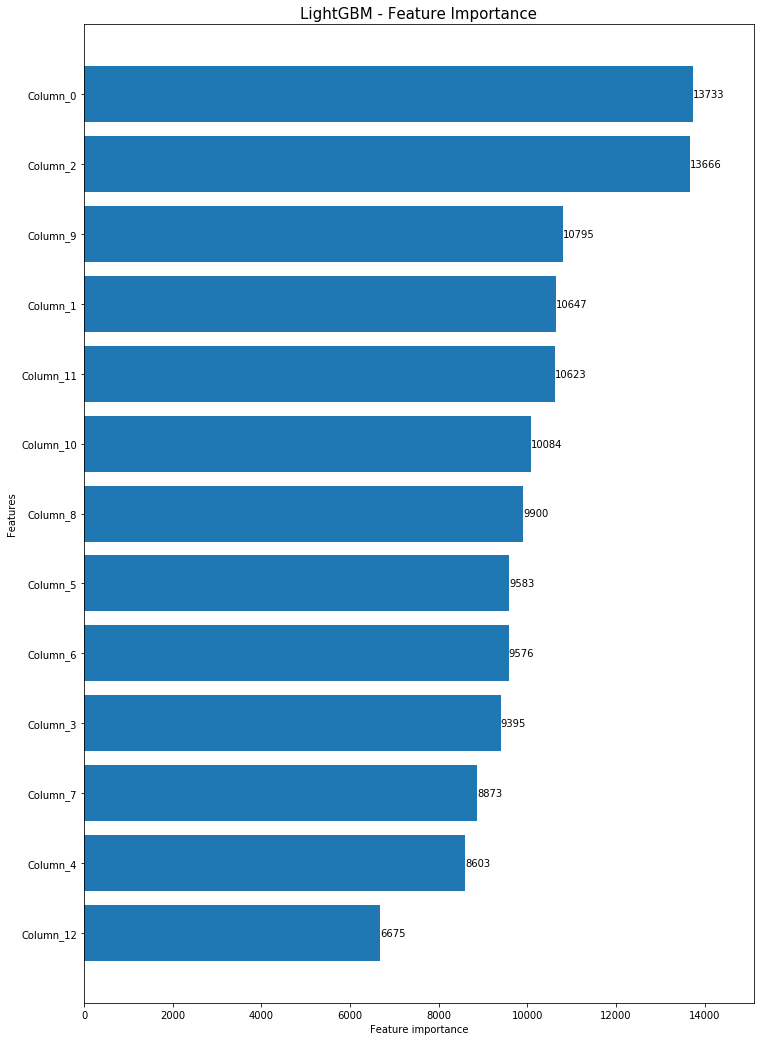

In [101]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [102]:
for i,p in enumerate(predictors):
    print("Column_"+ str(i) + " : " + p)

Column_0 : dullness
Column_1 : whiteness
Column_2 : average_pixel_width
Column_3 : dominant_red
Column_4 : dominant_green
Column_5 : dominant_blue
Column_6 : average_red
Column_7 : average_green
Column_8 : average_blue
Column_9 : stddev_red
Column_10 : stddev_green
Column_11 : stddev_blue
Column_12 : num_faces


In [103]:
preds = model.predict(X_test, num_iteration=model.best_iteration)

In [104]:
preds = np.argmax(preds,axis=1)

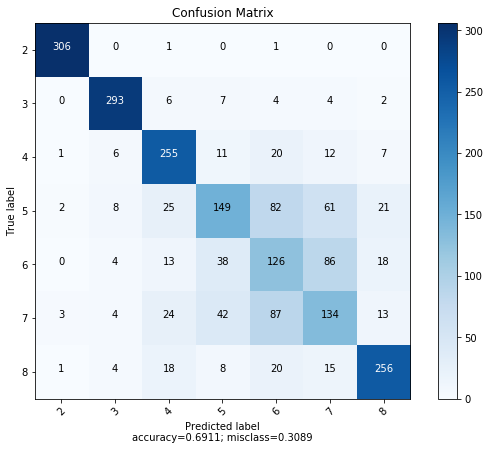

In [105]:
cm = confusion_matrix(y_test,preds)

plot_confusion_matrix(cm = cm , 
                      normalize    = False,
                      target_names = ["2","3","4","5","6","7","8"],
                      title        = "Confusion Matrix")

In [106]:
print("Accuracy using Light GBM with SMOTE data : {}".format(accuracy_score(y_test,preds)))
print("F1-Score using Light GBM with SMOTE data : {}".format(f1_score(y_test,preds,average='weighted')))

Accuracy using Light GBM with SMOTE data : 0.6910828025477707
F1-Score using Light GBM with SMOTE data : 0.6898396590759431


----
Above confusion matrix and accuracies show show major improvements.

### Other Ideas about features from Image

- No of objects detected 
- No. of shapes detected
- Texture based features

### To Improve classifier's performance
- Hyperparameter tuning

Above ideas can definitely be experimented with more time